<a href="https://colab.research.google.com/github/NishantRajora/Machine-Learning/blob/main/lab2_2(Silhouette_Score).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

In [ ]:
iris= load_iris()
X=iris.data
feature_names=iris.feature_names

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = hc.fit_predict(X_scaled)

In [ ]:
#Create  df
df= pd.DataFrame(X, columns=feature_names)
df['cluster']=clusters
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     cluster  
0          1

In [ ]:
df = pd.DataFrame(X, columns=feature_names)
df['cluster'] = clusters
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [ ]:
kmeans_score = silhouette_score(X_scaled, kmeans_clusters)
hc_score = silhouette_score(X_scaled, hc_clusters)

K-Means Silhouette Score: 0.45994823920518635


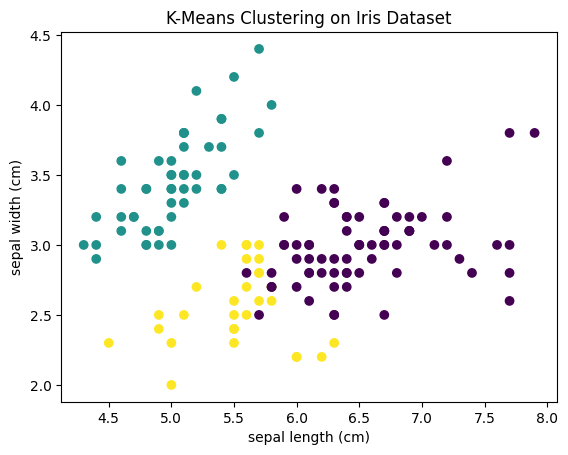

In [ ]:
# Plot CLustering result using first two features
print('K-Means Silhouette Score:', kmeans_score)

plt.figure()
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['cluster'])
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering on Iris Dataset')
plt.show()

Hierarchical Silhouette Score: 0.4466890410285909


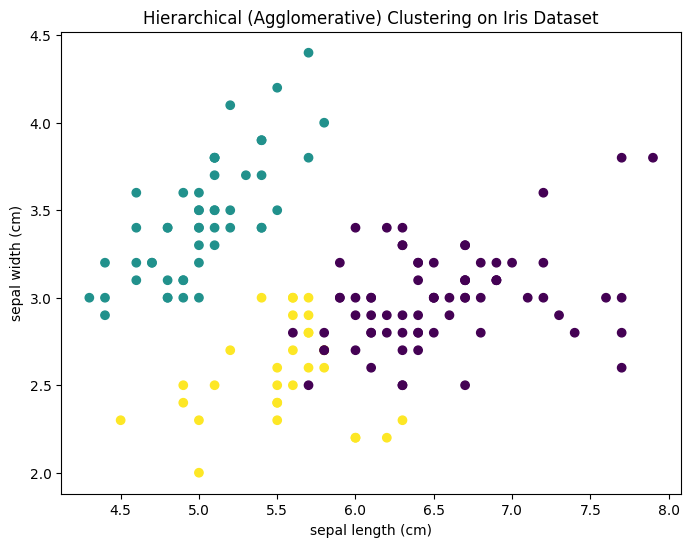

In [ ]:
print('Hierarchical Silhouette Score:', hc_score)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Hierarchical (Agglomerative) Clustering on Iris Dataset')
plt.show()

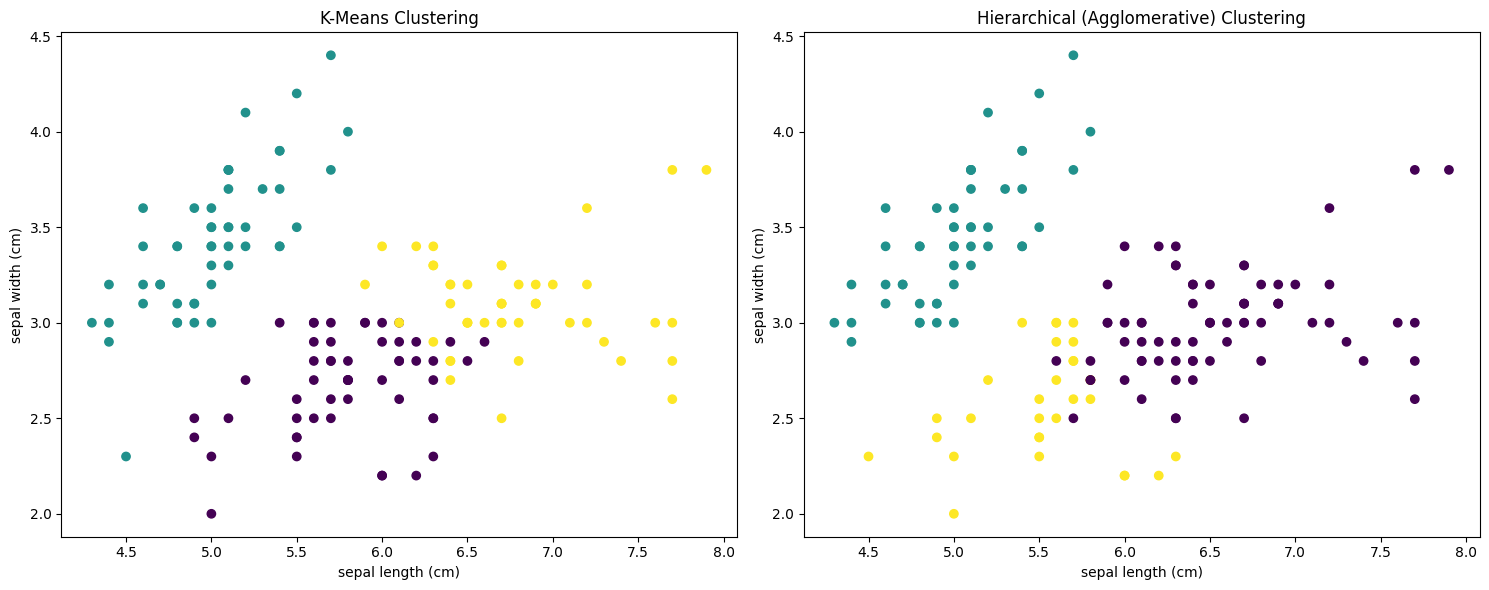

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 1 row, 2 columns

# Plot 1: K-Means
axes[0].scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_clusters, cmap='viridis')
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('K-Means Clustering')

# Plot 2: Hierarchical
axes[1].scatter(df.iloc[:, 0], df.iloc[:, 1], c=hc_clusters, cmap='viridis')
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])
axes[1].set_title('Hierarchical (Agglomerative) Clustering')

plt.tight_layout()
plt.show()

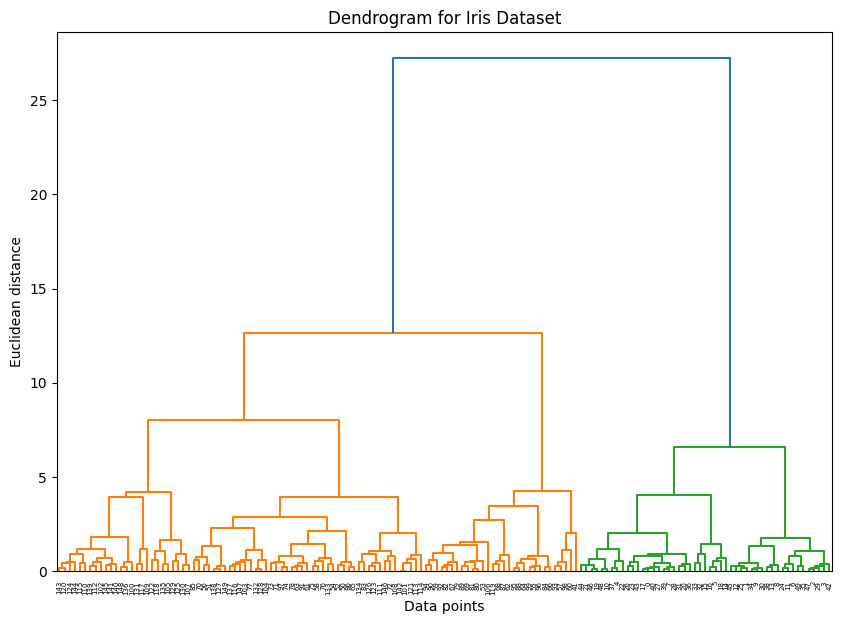

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()